In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
import pandas as pd
df = pd.read_excel('data/ElectricityByUtility.xlsx')

In [26]:
df_encoded = pd.get_dummies(df, columns=['Utility Type', 'Utility Name'])

X = df_encoded.drop('Total Usage', axis=1)
y = df_encoded['Total Usage']

In [27]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.9166144681921454e-22


Top 5 Consumers:
Utility Name
Southern California Edison Company           2.678135e+06
Pacific Gas and Electric Company             2.628503e+06
Los Angeles Department of Water and Power    7.414466e+05
San Diego Gas and Electric Company           5.958244e+05
Sacramento Municipal Utility District        3.260855e+05
Name: Total Usage, dtype: float64


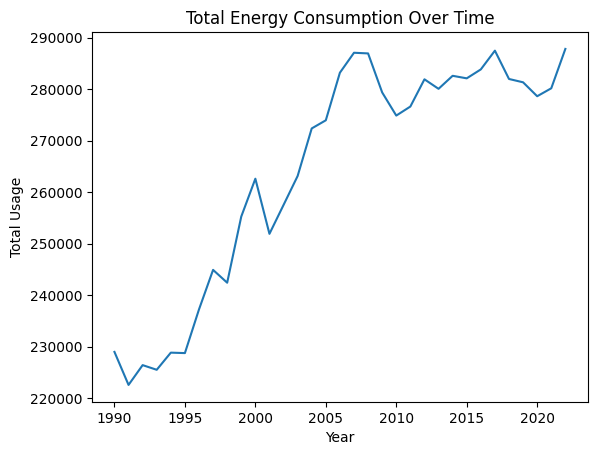

Total consumption is 1643.70% above industry average.
Potential energy savings: 8218519.34 kWh


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('data/ElectricityByUtility.xlsx')

# Identify high consumption areas
total_consumption_by_area = df.groupby('Utility Name')['Total Usage'].sum()
top_consumers = total_consumption_by_area.nlargest(5)  # Get top 5 consumers
print("Top 5 Consumers:")
print(top_consumers)

# Temporal analysis
yearly_consumption = df.groupby('Year')['Total Usage'].sum()
plt.plot(yearly_consumption.index, yearly_consumption.values)
plt.xlabel('Year')
plt.ylabel('Total Usage')
plt.title('Total Energy Consumption Over Time')
plt.show()

# Comparison with benchmarks (hypothetical example)
industry_average = 500000  # Hypothetical industry average
total_consumption = df['Total Usage'].sum()
percentage_above_average = ((total_consumption - industry_average) / industry_average) * 100
print(f"Total consumption is {percentage_above_average:.2f}% above industry average.")

# Energy efficiency potential
potential_savings = total_consumption - industry_average
print(f"Potential energy savings: {potential_savings:.2f} kWh")

# These are simplified examples, and the actual analysis may require more detailed and domain-specific approaches.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data
df = pd.read_excel('data/ElectricityByUtility.xlsx')

# Prepare the data
X = df[['Year', 'Utility Name']]
y = df['Total Usage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

future_predictions = {}

# each utility
for utility_name in df['Utility Name'].unique():
    X_utility = X_train[X_train['Utility Name'] == utility_name]['Year'].values.reshape(-1, 1)
    y_utility = y_train[X_train['Utility Name'] == utility_name]

    model = LinearRegression()

    model.fit(X_utility, y_utility)

    future_years = np.array(range(df['Year'].max() + 1, df['Year'].max() + 6)).reshape(-1, 1)
    future_predictions[utility_name] = model.predict(future_years)

for utility_name, predictions in future_predictions.items():
    print(f"Utility: {utility_name}")
    for year, prediction in zip(future_years.flatten(), predictions):
        print(f"  {year}: {prediction:.2f} kWh")


Utility: Alameda Municipal Power
  2023: 324.39 kWh
  2024: 320.48 kWh
  2025: 316.57 kWh
  2026: 312.65 kWh
  2027: 308.74 kWh
Utility: Anaheim, City of
  2023: 2366.05 kWh
  2024: 2367.00 kWh
  2025: 2367.95 kWh
  2026: 2368.90 kWh
  2027: 2369.85 kWh
Utility: Anza Electric Cooperative, Inc.
  2023: 65.08 kWh
  2024: 66.30 kWh
  2025: 67.52 kWh
  2026: 68.74 kWh
  2027: 69.96 kWh
Utility: Avista Energy
  2023: 23.37 kWh
  2024: 23.37 kWh
  2025: 23.37 kWh
  2026: 23.37 kWh
  2027: 23.37 kWh
Utility: Azusa Light and Water
  2023: 266.69 kWh
  2024: 268.75 kWh
  2025: 270.80 kWh
  2026: 272.85 kWh
  2027: 274.90 kWh
Utility: Banning, City of
  2023: 154.89 kWh
  2024: 156.40 kWh
  2025: 157.91 kWh
  2026: 159.42 kWh
  2027: 160.93 kWh
Utility: Bear Valley Electric Service
  2023: 138.24 kWh
  2024: 138.99 kWh
  2025: 139.74 kWh
  2026: 140.49 kWh
  2027: 141.24 kWh
Utility: Biggs Municipal Utilities
  2023: 20.21 kWh
  2024: 20.59 kWh
  2025: 20.97 kWh
  2026: 21.35 kWh
  2027: 21.73 k